In [40]:
#load packages 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from scipy.io import loadmat
#sklearn 
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [41]:
#gcparser function for wrangling of matlab data
import numpy as np
import pandas as pd

def gcparser(mat):
    """
    Extracts essential data from a Matlab formatted GCMS object loaded
    by sio.loadmat and wrangles this into a pandas dataframe
    
    Parameters:
    mat (dict): Dictionary produced by loading a file using sio.loadmat

    Return:
    DataFrame: Total ion counts (TIC) arranged by samples (columns) and
               retention time (rows)
    
    """    
    data = np.transpose(mat['XTIC'])  #XTIC is a matix of measured values from GC-MS
    sample_names = mat['SAM']  # SAM contains the name of each sample
    sample_names = np.hstack(np.hstack(sample_names)).tolist()  # convert nested numpy arrays into a list
    RT = mat['RT']  # RT is retention time (in minutes)
    RT = np.hstack(np.hstack(RT)).tolist()  # convert nested numpy arrays into a list
    y = mat['CLASS']  #CLASS is the diagnosis of each sample (in this casse 1=control; 2=CD)
    y = np.hstack(y).tolist()  # convert nested numpy arrays into a list
    # put pieces back together in a pandas dataframe
    return pd.DataFrame(data, columns=sample_names, index=RT)

In [42]:
# Import the data from the MAT file using loadmat() from scipy.
# Load the .mat file
mat_data_blood = loadmat('/Users/izziedonnelly/Downloads/gcms_data_zipped/blood/BWG_BL_CDvCTRL.mat') 
df_blood = gcparser(mat_data_blood)

mat_data_breath = loadmat('/Users/izziedonnelly/Downloads/gcms_data_zipped/breath/BWG_BR_CDvCTRL.mat') 
df_breath = gcparser(mat_data_breath)

mat_data_faecal = loadmat('/Users/izziedonnelly/Downloads/gcms_data_zipped/faecal/BWG_FA_CDvCTRL.mat') 
df_faecal = gcparser(mat_data_faecal)

mat_data_urine = loadmat('/Users/izziedonnelly/Downloads/gcms_data_zipped/urine/BWG_UR_CDvCTRL.mat') 
df_urine = gcparser(mat_data_urine)


In [43]:
#EDA 

Average Accuracy: 46.57%


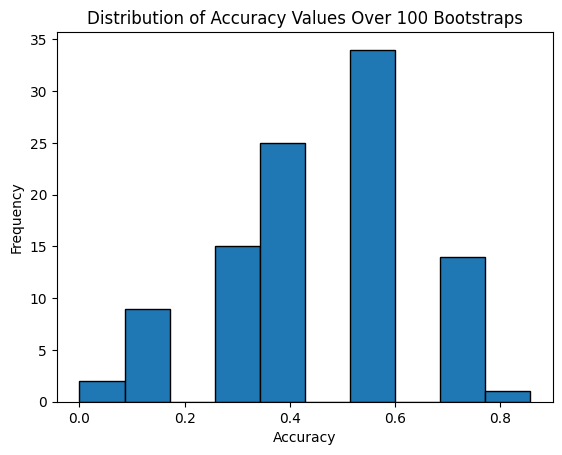

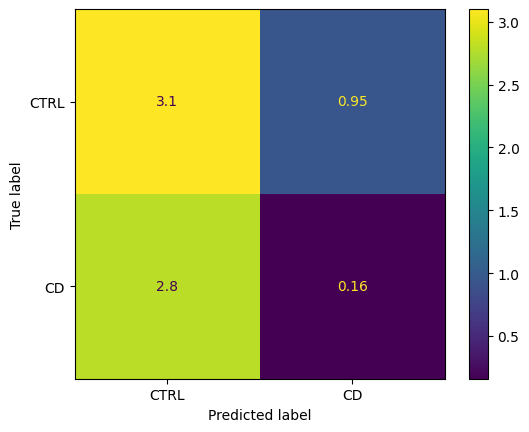

In [44]:
#SVM model for blood samples
# Transpose the DataFrame so that samples are rows and features are columns
X = df_blood.T.values  # Transpose the DataFrame
y = np.array([1 if 'CD' in name else 0 for name in df_blood.columns])  # Assuming 'CD' in the column name indicates a CD sample

accuracies = []
confusion_matrices = []

for i in range(100):  # 100 bootstrap iterations
    # Create a bootstrap sample
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Train the model
    clf = svm.SVC()
    clf.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Store confusion matrix for each iteration with fixed labels
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Assuming labels are 0 and 1
    confusion_matrices.append(cm)


# Calculate average accuracy
average_accuracy_blood_svm = np.mean(accuracies)
print(f"Average Accuracy: {average_accuracy_blood_svm * 100:.2f}%")

# Plot a histogram of accuracy values
plt.hist(accuracies, bins=10, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Values Over 100 Bootstraps')
plt.show()

# Convert list of arrays to 3D numpy array for averaging
confusion_matrices_array = np.array(confusion_matrices)

# Aggregate and display the average confusion matrix
average_confusion_matrix = np.mean(confusion_matrices_array, axis=0)
ConfusionMatrixDisplay(average_confusion_matrix, display_labels=['CTRL', 'CD']).plot()
plt.show()


Average Accuracy: 41.43%


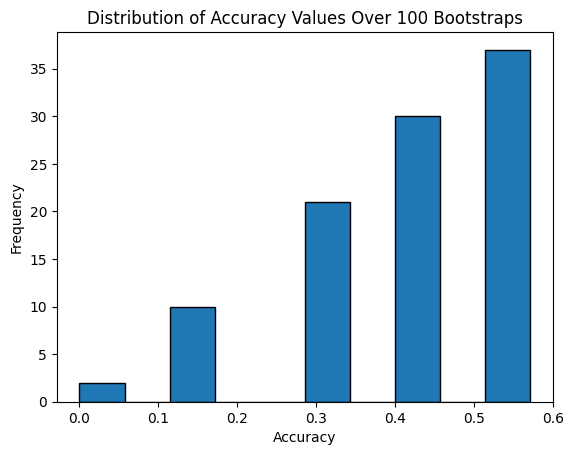

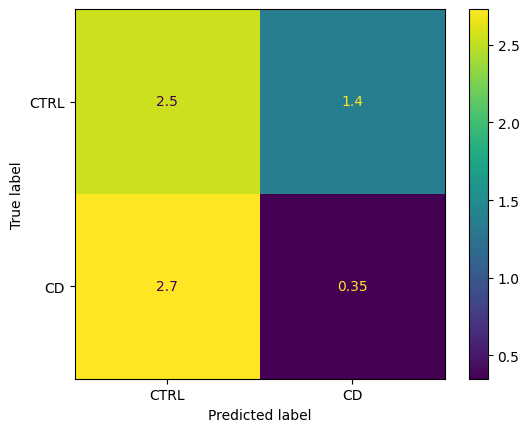

In [45]:
#SVM model for breath samples
# Transpose the DataFrame so that samples are rows and features are columns
X = df_breath.T.values  # Transpose the DataFrame
y = np.array([1 if 'CD' in name else 0 for name in df_breath.columns])  # Assuming 'CD' in the column name indicates a CD sample

accuracies = []
confusion_matrices = []

for i in range(100):  # 100 bootstrap iterations
    # Create a bootstrap sample
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Train the model
    clf = svm.SVC()
    clf.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Store confusion matrix for each iteration with fixed labels
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Assuming labels are 0 and 1
    confusion_matrices.append(cm)


# Calculate average accuracy
average_accuracy_breath_svm = np.mean(accuracies)
print(f"Average Accuracy: {average_accuracy_breath_svm * 100:.2f}%")

# Plot a histogram of accuracy values
plt.hist(accuracies, bins=10, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Values Over 100 Bootstraps')
plt.show()

# Convert list of arrays to 3D numpy array for averaging
confusion_matrices_array = np.array(confusion_matrices)

# Aggregate and display the average confusion matrix
average_confusion_matrix = np.mean(confusion_matrices_array, axis=0)
ConfusionMatrixDisplay(average_confusion_matrix, display_labels=['CTRL', 'CD']).plot()
plt.show()

Average Accuracy: 69.80%


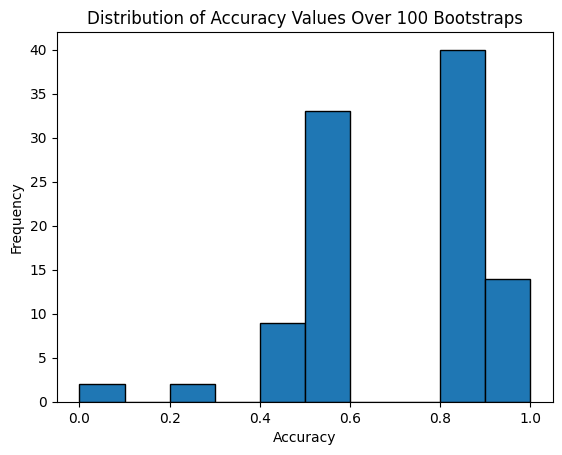

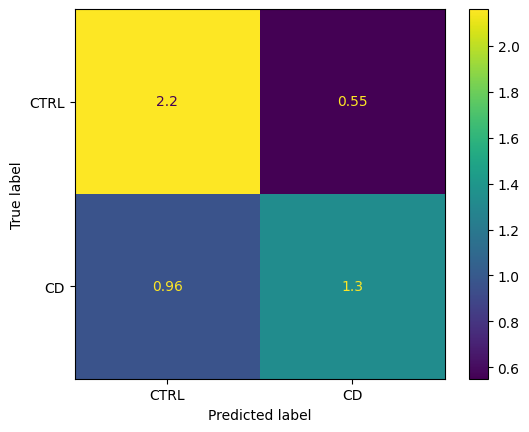

In [46]:
#SVM model for faecal samples
# Transpose the DataFrame so that samples are rows and features are columns
X = df_faecal.T.values  # Transpose the DataFrame
y = np.array([1 if 'CD' in name else 0 for name in df_faecal.columns])  # Assuming 'CD' in the column name indicates a CD sample

accuracies = []
confusion_matrices = []

for i in range(100):  # 100 bootstrap iterations
    # Create a bootstrap sample
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Train the model
    clf = svm.SVC()
    clf.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Store confusion matrix for each iteration with fixed labels
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Assuming labels are 0 and 1
    confusion_matrices.append(cm)


# Calculate average accuracy
average_accuracy_faecal_svm = np.mean(accuracies)
print(f"Average Accuracy: {average_accuracy_faecal_svm * 100:.2f}%")

# Plot a histogram of accuracy values
plt.hist(accuracies, bins=10, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Values Over 100 Bootstraps')
plt.show()

# Convert list of arrays to 3D numpy array for averaging
confusion_matrices_array = np.array(confusion_matrices)

# Aggregate and display the average confusion matrix
average_confusion_matrix = np.mean(confusion_matrices_array, axis=0)
ConfusionMatrixDisplay(average_confusion_matrix, display_labels=['CTRL', 'CD']).plot()
plt.show()

Average Accuracy: 60.80%


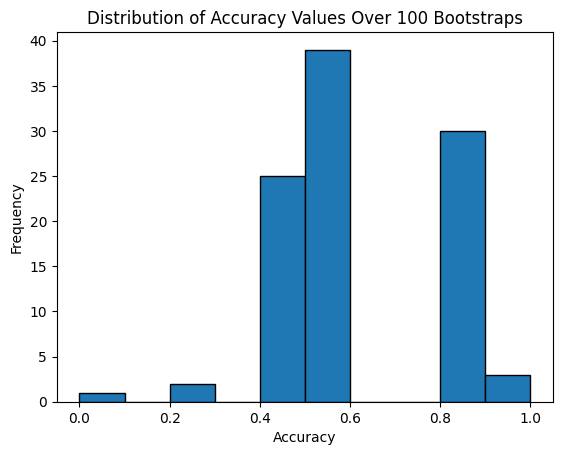

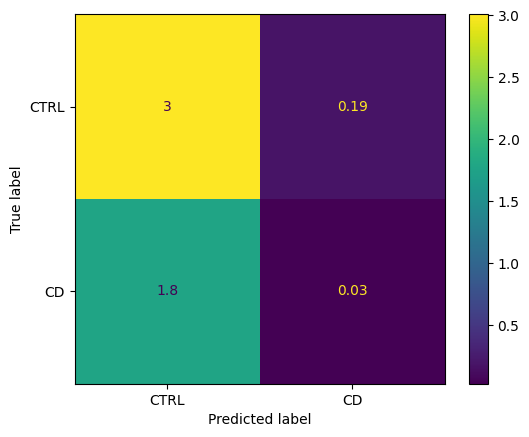

In [47]:
#SVM model for urine samples
# Transpose the DataFrame so that samples are rows and features are columns
X = df_urine.T.values  # Transpose the DataFrame
y = np.array([1 if 'CD' in name else 0 for name in df_urine.columns])  # Assuming 'CD' in the column name indicates a CD sample

accuracies = []
confusion_matrices = []

for i in range(100):  # 100 bootstrap iterations
    # Create a bootstrap sample
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Train the model
    clf = svm.SVC()
    clf.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Store confusion matrix for each iteration with fixed labels
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Assuming labels are 0 and 1
    confusion_matrices.append(cm)


# Calculate average accuracy
average_accuracy_urine_svm = np.mean(accuracies)
print(f"Average Accuracy: {average_accuracy_urine_svm * 100:.2f}%")

# Plot a histogram of accuracy values
plt.hist(accuracies, bins=10, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Values Over 100 Bootstraps')
plt.show()

# Convert list of arrays to 3D numpy array for averaging
confusion_matrices_array = np.array(confusion_matrices)

# Aggregate and display the average confusion matrix
average_confusion_matrix = np.mean(confusion_matrices_array, axis=0)
ConfusionMatrixDisplay(average_confusion_matrix, display_labels=['CTRL', 'CD']).plot()
plt.show()

Average Accuracy (Random Forest): 39.57%


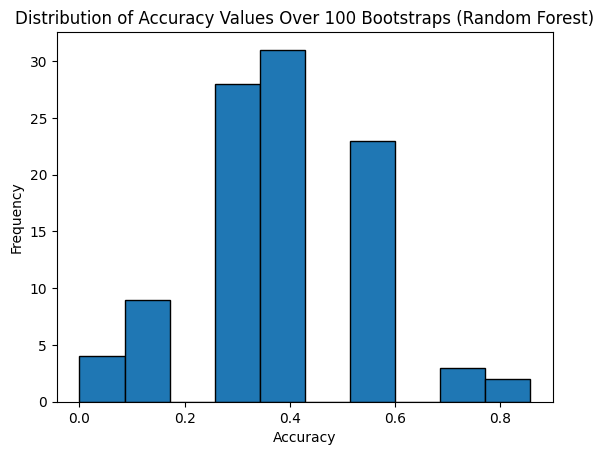

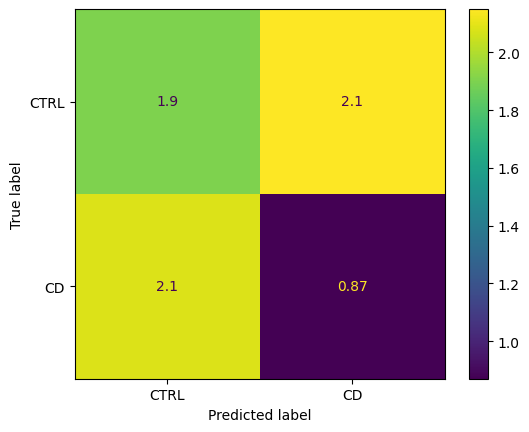

In [48]:
#Random Forest Model for blood samples
X = df_blood.T.values  # Transpose the DataFrame
y = np.array([1 if 'CD' in name else 0 for name in df_blood.columns])  # Assuming 'CD' in the column name indicates a CD sample

rf_accuracies = []
confusion_matrices = []

for i in range(100):  # 100 bootstrap iterations
    # Create a bootstrap sample
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Train the Random Forest classifier
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    rf_accuracies.append(accuracy)

    # Store confusion matrix for each iteration with fixed labels
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Assuming labels are 0 and 1
    confusion_matrices.append(cm)

# Calculate average accuracy
average_accuracy_blood_rf = np.mean(rf_accuracies)
print(f"Average Accuracy (Random Forest): {average_accuracy_blood_rf * 100:.2f}%")

# Plot a histogram of accuracy values
plt.hist(rf_accuracies, bins=10, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Values Over 100 Bootstraps (Random Forest)')
plt.show()

# Convert list of arrays to 3D numpy array for averaging
confusion_matrices_array = np.array(confusion_matrices)

# Aggregate and display the average confusion matrix
average_confusion_matrix = np.mean(confusion_matrices_array, axis=0)
ConfusionMatrixDisplay(average_confusion_matrix, display_labels=['CTRL', 'CD']).plot()
plt.show()


Average Accuracy (Random Forest): 63.71%


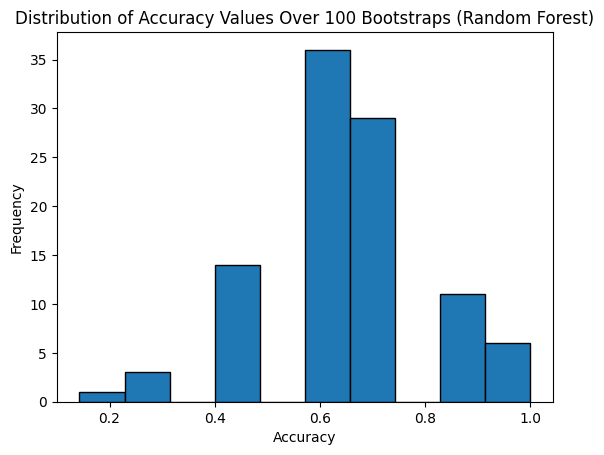

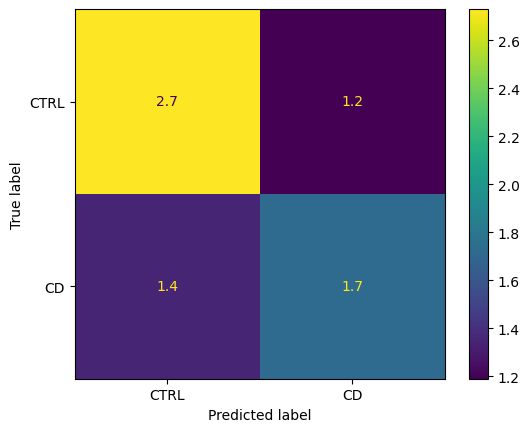

In [49]:
#Random Forest Model for breath samples

X = df_breath.T.values  # Transpose the DataFrame
y = np.array([1 if 'CD' in name else 0 for name in df_breath.columns])  # Assuming 'CD' in the column name indicates a CD sample

rf_accuracies = []
confusion_matrices = []

for i in range(100):  # 100 bootstrap iterations
    # Create a bootstrap sample
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Train the Random Forest classifier
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    rf_accuracies.append(accuracy)

    # Store confusion matrix for each iteration with fixed labels
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Assuming labels are 0 and 1
    confusion_matrices.append(cm)

# Calculate average accuracy
average_accuracy_breath_rf = np.mean(rf_accuracies)
print(f"Average Accuracy (Random Forest): {average_accuracy_breath_rf * 100:.2f}%")

# Plot a histogram of accuracy values
plt.hist(rf_accuracies, bins=10, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Values Over 100 Bootstraps (Random Forest)')
plt.show()

# Convert list of arrays to 3D numpy array for averaging
confusion_matrices_array = np.array(confusion_matrices)

# Aggregate and display the average confusion matrix
average_confusion_matrix = np.mean(confusion_matrices_array, axis=0)
ConfusionMatrixDisplay(average_confusion_matrix, display_labels=['CTRL', 'CD']).plot()
plt.show()

Average Accuracy (Random Forest): 84.40%


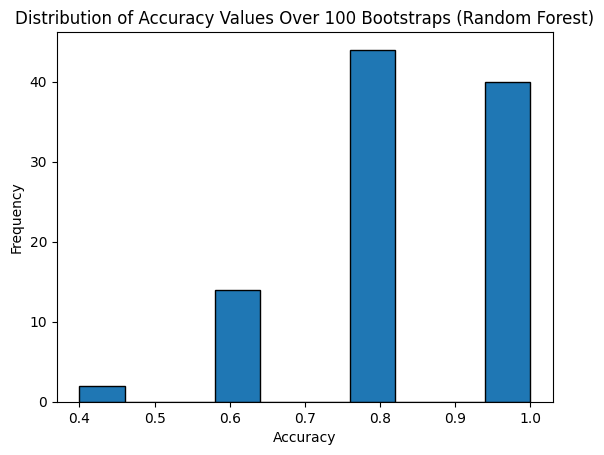

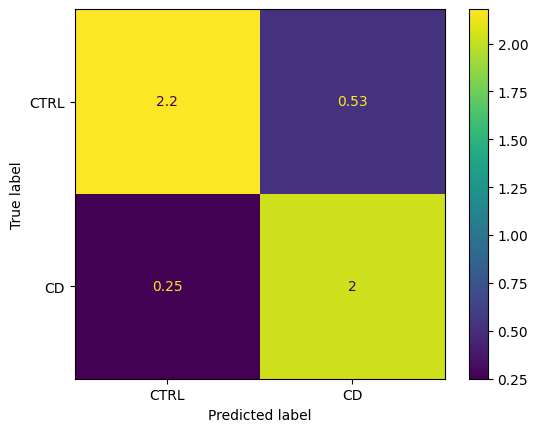

In [50]:
#Random Forest Model for faecal samples

X = df_faecal.T.values  # Transpose the DataFrame
y = np.array([1 if 'CD' in name else 0 for name in df_faecal.columns])  # Assuming 'CD' in the column name indicates a CD sample

rf_accuracies = []
confusion_matrices = []

for i in range(100):  # 100 bootstrap iterations
    # Create a bootstrap sample
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Train the Random Forest classifier
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    rf_accuracies.append(accuracy)

    # Store confusion matrix for each iteration with fixed labels
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Assuming labels are 0 and 1
    confusion_matrices.append(cm)

# Calculate average accuracy
average_accuracy_faecal_rf = np.mean(rf_accuracies)
print(f"Average Accuracy (Random Forest): {average_accuracy_faecal_rf * 100:.2f}%")

# Plot a histogram of accuracy values
plt.hist(rf_accuracies, bins=10, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Values Over 100 Bootstraps (Random Forest)')
plt.show()

# Convert list of arrays to 3D numpy array for averaging
confusion_matrices_array = np.array(confusion_matrices)

# Aggregate and display the average confusion matrix
average_confusion_matrix = np.mean(confusion_matrices_array, axis=0)
ConfusionMatrixDisplay(average_confusion_matrix, display_labels=['CTRL', 'CD']).plot()
plt.show()

Average Accuracy (Random Forest): 63.40%


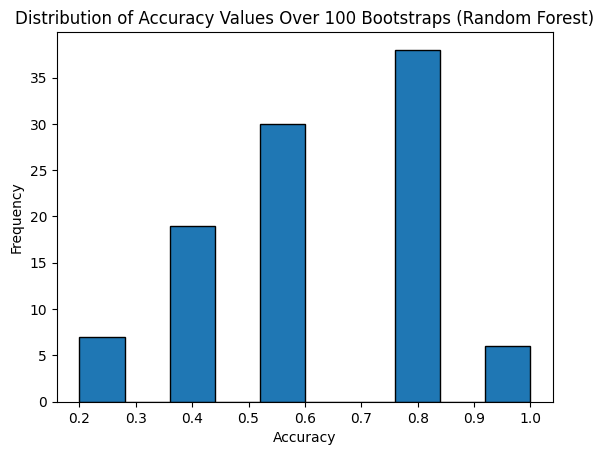

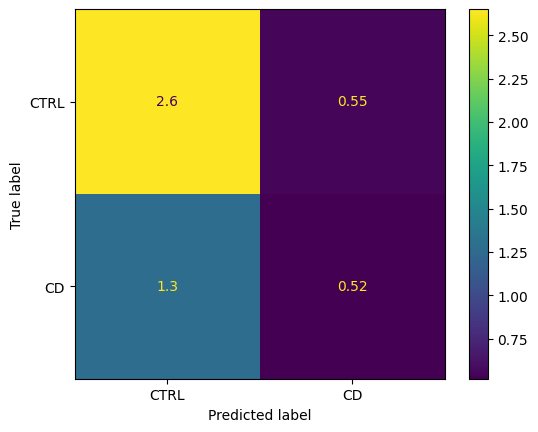

In [67]:
#Random Forest Model for urine samples

X = df_urine.T.values  # Transpose the DataFrame
y = np.array([1 if 'CD' in name else 0 for name in df_urine.columns])  # Assuming 'CD' in the column name indicates a CD sample

rf_accuracies = []
confusion_matrices = []

for i in range(100):  # 100 bootstrap iterations
    # Create a bootstrap sample
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Train the Random Forest classifier
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    rf_accuracies.append(accuracy)

    # Store confusion matrix for each iteration with fixed labels
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Assuming labels are 0 and 1
    confusion_matrices.append(cm)

# Calculate average accuracy
average_accuracy_urine_rf = np.mean(rf_accuracies)
print(f"Average Accuracy (Random Forest): {average_accuracy_urine_rf * 100:.2f}%")

# Plot a histogram of accuracy values
plt.hist(rf_accuracies, bins=10, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Values Over 100 Bootstraps (Random Forest)')
plt.show()

# Convert list of arrays to 3D numpy array for averaging
confusion_matrices_array = np.array(confusion_matrices)

# Aggregate and display the average confusion matrix
average_confusion_matrix = np.mean(confusion_matrices_array, axis=0)
ConfusionMatrixDisplay(average_confusion_matrix, display_labels=['CTRL', 'CD']).plot()
plt.show()

In [52]:
#best model for each sample type 

#blood = svm 

#breath = rf

#faecal = rf

#urine = rf


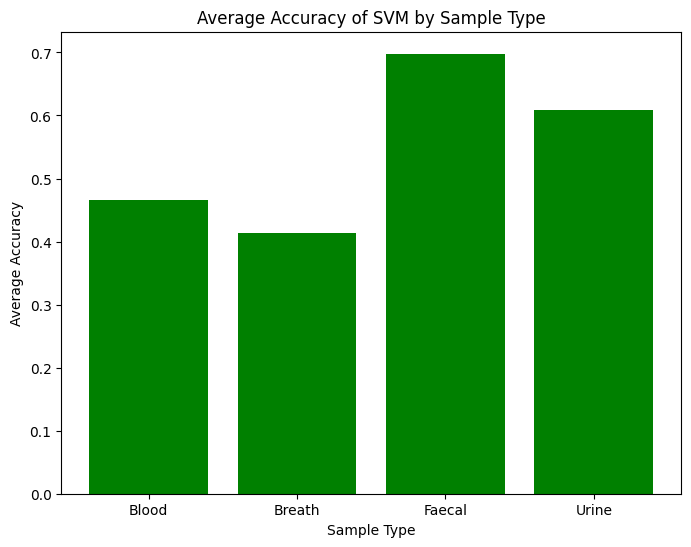

In [58]:
#plot of model accuracy
#create df of accuracy scores

df_accuracy_svm = (average_accuracy_blood_svm,average_accuracy_breath_svm, 
                   average_accuracy_faecal_svm, average_accuracy_urine_svm)

sample_types = ['Blood', 'Breath', 'Faecal', 'Urine']


plt.figure(figsize=(8, 6))
plt.bar(sample_types, df_accuracy_svm, color='green')

# Add labels and title
plt.xlabel('Sample Type')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy of SVM by Sample Type')

# Show the plot
plt.show()

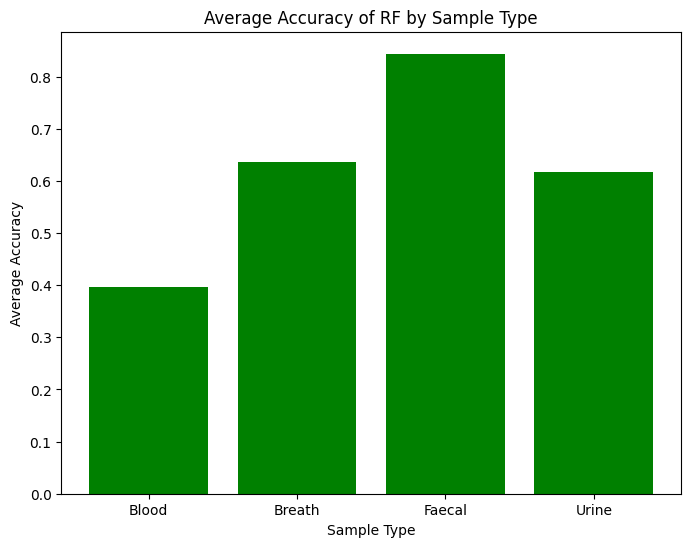

In [66]:
#compile accuracies into a df
df_accuracy_rf = (average_accuracy_blood_rf,average_accuracy_breath_rf, 
                   average_accuracy_faecal_rf, average_accuracy_urine_rf)

sample_types = ['Blood', 'Breath', 'Faecal', 'Urine']

#bar chart of accuracies for each sample type's rf model 
plt.figure(figsize=(8, 6))
plt.bar(sample_types, df_accuracy_rf, color='green')
plt.xlabel('Sample Type')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy of RF by Sample Type')

# Show the plot
plt.show()

In [65]:
#comparing faecal RF model to random chance 

#calculate random chance accuracy 
y = np.array([1 if 'CD' in name else 0 for name in df_faecal.columns])
class_distribution = np.bincount(y) 
majority_class_proportion = np.max(class_distribution) / len(y)
random_chance_accuracy = majority_class_proportion
print(f"Random Chance Accuracy: {random_chance_accuracy * 100:.2f}%")


Random Chance Accuracy: 52.17%


In [64]:
#compare random chance to random forest model for faecal samples
improvement_over_random = average_accuracy_faecal_rf - random_chance_accuracy
print(f"Improvement Over Random Chance: {improvement_over_random * 100:.2f}%")

Improvement Over Random Chance: 32.23%
